In [11]:
import numpy as np
import torch
import time
import matplotlib.pyplot as plt

In [118]:
from mpl_toolkits.axisartist.axislines import SubplotZero
def draw_x():
    fig = plt.figure()
    ax = SubplotZero(fig, 111)
    fig.add_subplot(ax)
    ax.axis["xzero"].set_axisline_style("-|>")
    ax.axis["xzero"].set_visible(True)

In [119]:
class Circle:
    def __init__(self, cx: np.float32, cy: np.float32, radius: np.float32, noise: np.float32):
        self._radius = radius
        self._noise = noise
        self._cx = cx
        self._cy = cy

    def sample(self):
        w = np.random.random() * 2 * np.pi
        x = np.cos(w) * self._radius + self._cx
        x += np.random.randn() * self._noise
        y = np.sin(w) * self._radius + self._cy
        y += np.random.randn() * self._noise
        return x, y

    def contour(self, n: int):
        w = np.linspace(0, 2 * np.pi, num=n)
        x = np.cos(w) * self._radius + self._cx
        y = np.sin(w) * self._radius + self._cy
        xy = np.stack((x, y), axis=1)
        return xy

    def area(self):
        a = np.pi * self._radius ** 2
        return a
    
def squareContour(n):
    size = int(n / 2)
    x1 = np.linspace(2, 4, num=size)
    y1 = np.ones(size) * 4
    c1 = np.stack((x1, y1), axis=1)

    y2 = np.linspace(2, 4, num=size)
    x2 = np.ones(size) * 4
    c2 = np.stack((x2, np.flip(y2)), axis=1)

    y3 = np.ones(size) * 2
    c3 = np.stack((np.flip(x1), y3), axis=1)

    x4 = np.ones(size) * 2
    c4 = np.stack((x4, y2), axis=1)
    
    return np.concatenate((c1, c2, c3, c4))

In [146]:
def trapezoidal(x0, y0, x1, y1):
    #print(f"{x0, y0}, {x1, y1} => {(x1 - x0) * ((y1 + y0) / 2)}")
    return (x1 - x0) * ((y1 + y0) / 2)

def area_core(points):
    n = len(points)

    def trapezoidal_i(i, j):
        return trapezoidal(points[i][0], points[i][1], points[j][0], points[j][1])
    sum_parts = [trapezoidal_i(i, i + 1) for i in range(n - 1)]
    sum_parts.append(trapezoidal_i(n - 1, 0))
    sum_parts.sort(key=lambda x: abs(x))
    return abs(sum(sum_parts))

In [150]:
circ = Circle(cx=0.5, cy=0.2, radius=1, noise=0.0)
contour = circ.contour
#contour = squareContour

n=1000, area: 3.1415719413758465


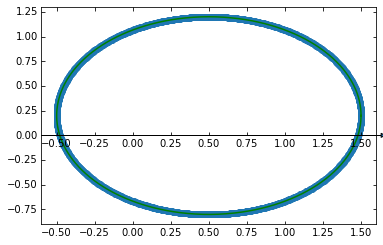

In [151]:
def split_points(points):
    xs = [p[0] for p in points]
    ys = [p[1] for p in points]
    return xs, ys
n = 1000
points = contour(n)
s = area_core(points)
print(f"n={n}, area: {s}")
xs, ys = split_points(points)
xs_smooth, ys_smooth = split_points(contour(1000))
draw_x()
plt.plot(xs, ys, 'o')
plt.plot(xs_smooth, ys_smooth, 'g')
plt.show()